# Reproduce Results Notebook

In this notebook, we combined all the work for easy execution of everything. We contain the train/validation/test results of ROC AUC as well as precision and recall.

Load all the necessary packages:

In [48]:
import os
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc

# our custom functions
from utils import remove_nan_questions

Important to note here that we chose to set seed=120 so we can reproduce the same results.

In [49]:
_path_folder_quora = "Datasets/QuoraQuestionPairs"
MODELS_DIR = "models"
SEED = 120

Firstly, we load and split the data:

In [50]:
train_df = pd.read_csv(os.path.join(_path_folder_quora, "quora_train_data.csv"))

x_train = train_df.loc[:, ["question1", "question2"]]
y_train = train_df.loc[:, "is_duplicate"]

x_train, y_train = remove_nan_questions(x_train, y_train)

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.05, random_state=SEED)
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.05, random_state=SEED)

Then, we load the 2 models for the simple pipeline and the improved:

In [51]:
simple_pipe = joblib.load(f'{MODELS_DIR}/simple_approach.pk1')
improved_pipe = joblib.load(f'{MODELS_DIR}/improved_approach.joblib')

Now, we will evaluate the performance for both pipelines

### Simple Approach

In [52]:
# prediction for train, validation, and test sets
y_pred_train = simple_pipe.predict(x_train)
y_probs_train = simple_pipe.predict_proba(x_train)[:, 1]

y_pred_validation = simple_pipe.predict(x_validation)
y_probs_validation = simple_pipe.predict_proba(x_validation)[:, 1]

y_pred_test = simple_pipe.predict(x_test)
y_probs_test = simple_pipe.predict_proba(x_test)[:, 1]

Here, we print the required metrics: precision, recall, f1-score and AUC.

In [53]:
fpr_train, tpr_train, _ = roc_curve(y_train, y_probs_train)
auc_roc_train = auc(fpr_train, tpr_train)

fpr_validation, tpr_validation, _ = roc_curve(y_validation, y_probs_validation)
auc_roc_validation = auc(fpr_validation, tpr_validation)

fpr_test, tpr_test, _ = roc_curve(y_test, y_probs_test)
auc_roc_test = auc(fpr_test, tpr_test)

print("TRAINING results:\n", classification_report(y_train, y_pred_train))
print("VALIDATION results:\n", classification_report(y_validation, y_pred_validation))
print("TESTING results:\n", classification_report(y_test, y_pred_test))

print("Training AUC:", auc_roc_train)
print("Valitaion AUC:", auc_roc_validation)
print("Testing AUC:", auc_roc_test)

TRAINING results:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86    184248
           1       0.78      0.69      0.73    107646

    accuracy                           0.81    291894
   macro avg       0.81      0.79      0.79    291894
weighted avg       0.81      0.81      0.81    291894

VALIDATION results:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81      9667
           1       0.68      0.62      0.65      5696

    accuracy                           0.75     15363
   macro avg       0.73      0.73      0.73     15363
weighted avg       0.75      0.75      0.75     15363

TESTING results:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81     10241
           1       0.68      0.62      0.65      5931

    accuracy                           0.75     16172
   macro avg       0.73      0.72      0.73     16172
weighted avg    

We also plot the ROC curve.

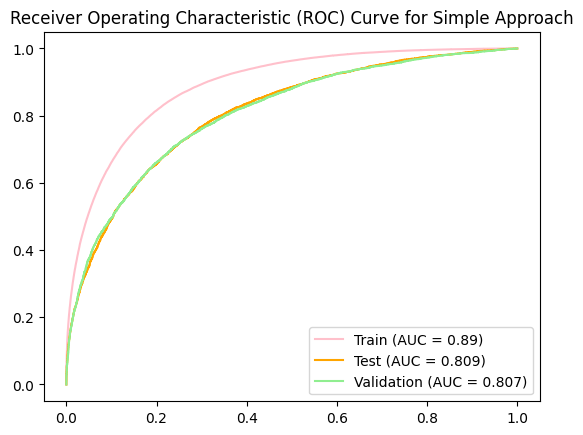

In [54]:
plt.plot(fpr_train, tpr_train, color='pink', label=f'Train (AUC = {round(auc_roc_train, 3)})')
plt.plot(fpr_validation, tpr_validation, color='lightgreen', label=f'Validation (AUC = {round(auc_roc_validation, 3)})')
plt.plot(fpr_test, tpr_test, color='orange', label=f'Test (AUC = {round(auc_roc_test, 3)})')

plt.legend()
plt.title('Receiver Operating Characteristic (ROC) Curve for Simple Approach')
plt.savefig(f'{MODELS_DIR}/roc_curve_simple.png', dpi=250)
plt.show()
plt.close()


### Improved Approach

In [55]:
# prediction for train, validation, and test sets
y_pred_train = improved_pipe.predict(x_train)
y_probs_train = improved_pipe.predict_proba(x_train)[:, 1]

y_pred_validation = improved_pipe.predict(x_validation)
y_probs_validation = improved_pipe.predict_proba(x_validation)[:, 1]

y_pred_test = improved_pipe.predict(x_test)
y_probs_test = improved_pipe.predict_proba(x_test)[:, 1]

Again, we print the required metrics: precision, recall, f1-score and AUC.

In [56]:
fpr_train, tpr_train, _ = roc_curve(y_train, y_probs_train)
auc_roc_train = auc(fpr_train, tpr_train)

fpr_validation, tpr_validation, _ = roc_curve(y_validation, y_probs_validation)
auc_roc_validation = auc(fpr_validation, tpr_validation)

fpr_test, tpr_test, _ = roc_curve(y_test, y_probs_test)
auc_roc_test = auc(fpr_test, tpr_test)

print("TRAINING results:\n", classification_report(y_train, y_pred_train))
print("VALIDATION results:\n", classification_report(y_validation, y_pred_validation))
print("TESTING results:\n", classification_report(y_test, y_pred_test))

print("Training AUC:", auc_roc_train)
print("Valitaion AUC:", auc_roc_validation)
print("Testing AUC:", auc_roc_test)

TRAINING results:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99    184248
           1       0.97      0.99      0.98    107646

    accuracy                           0.98    291894
   macro avg       0.98      0.98      0.98    291894
weighted avg       0.98      0.98      0.98    291894

VALIDATION results:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      9667
           1       0.80      0.77      0.79      5696

    accuracy                           0.85     15363
   macro avg       0.84      0.83      0.83     15363
weighted avg       0.85      0.85      0.85     15363

TESTING results:
               precision    recall  f1-score   support

           0       0.87      0.88      0.88     10241
           1       0.79      0.78      0.79      5931

    accuracy                           0.84     16172
   macro avg       0.83      0.83      0.83     16172
weighted avg    

And plotting the ROC curve:

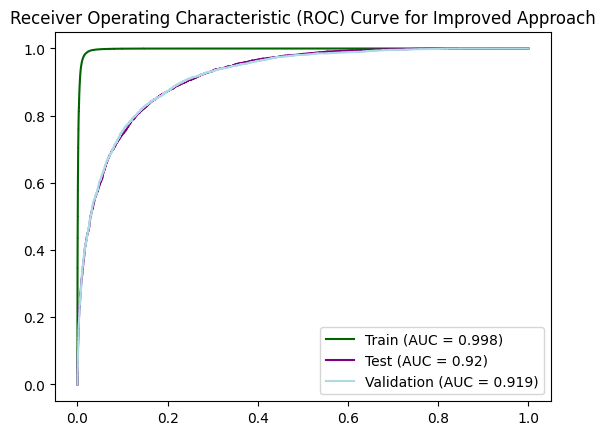

In [59]:
plt.plot(fpr_train, tpr_train, color='darkgreen', label=f'Train (AUC = {round(auc_roc_train, 3)})')
plt.plot(fpr_validation, tpr_validation, color='lightblue', label=f'Validation (AUC = {round(auc_roc_validation, 3)})')
plt.plot(fpr_test, tpr_test, color='purple', label=f'Test (AUC = {round(auc_roc_test, 3)})')

plt.legend()
plt.title('Receiver Operating Characteristic (ROC) Curve for Improved Approach')
plt.savefig(f'{MODELS_DIR}/roc_curve_improved.png', dpi=250)
plt.show()
plt.close()
